# Lecture 2. Differential Equations Intro

Things to add:  
    - Discussion that N is really N(t) and N(t) is this unknown function that we need to find

**The goal of this jupyter notebook is to introduce you to analytical and numerical solutions of differential equations using SymPy dsolve() and SciPy solve_ivp() using bacterial growth as an example**

A major goal of basic science is to predict how a system will evolve over time given initial conditions.  
Differential equations is the mathematical tool that scientists use to achieve this goal.  

Some examples of systems that can be described using differentail equations:
- calculate changes of concentration of metabolites over time from enzyme reaction rates and concentrations at time=0
- calculate changes in mRNA or protein concentration over time from transcription, translation, degradation rates and concentrations at time=0
- calculate changes in the size of populations over time from growth rates and population sizes at time=0  
- calculate the number of infected people given virus transmission rates and number of people at t=0
- calculate changes of position of objects over time from speed, acceleration and positions at time=0  
  
Differential equations are also useful for studying things other than time (e.g. but most biology application involve time so we'll focus on time.
  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

## Bacterial Growth

We will motivate the usefulness of differential equations using bacterial growth as an example

From experiments, we know that E. coli growth rate in rich media is exponential:
  
$N(t)=N_0e^{kt}$  

where $t$ is time,  
k is some constant specific for this E.coli strain and growth conditions,  
$N(t)$ is number of E. coli at time $t$,  
$N_0$ is number of E. coli at $t=0$  

Let's plot $N(t)=e^{t}$

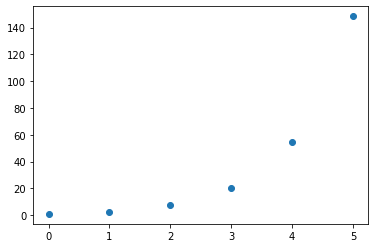

In [9]:
time = np.linspace(0, 5, 6)
OD600 = np.exp(time)
plt.scatter(time, OD600);

Side note: You can look up documentation of any python function using "?" as shown below or you can also google it

In [ ]:
np.linspace?

Now let's pretend that we do **not** know that E. coli growth rate in rich media is exponential.  
Lets try to derive $N(t)=N_0e^{kt}$ from $Growth\,Rate$ and initial E.coli number $N_0$.

## Definition of a Differential

First, we need to figure out what is $Growth\,Rate$, exactly?  
We know that $Growth\,Rate=\frac{\Delta N}{\Delta t}$ but which $\Delta N$ and $\Delta t$ should we use?  
Lets try several values of $\Delta N$ and $\Delta t$ to find $Growth\,Rate$ at t=0 and t=5 using the data above:

In [10]:
(OD600[5] - OD600[0]) / 5

29.48263182051532

In [11]:
(OD600[4] - OD600[0]) / 4, (OD600[5] - OD600[1]) / 4

(13.399537508286059, 36.423719318529386)

In [12]:
(OD600[3] - OD600[0]) / 3, (OD600[5] - OD600[2]) / 3

(6.361845641062556, 47.008034334548654)

In [13]:
(OD600[2] - OD600[0]) / 2, (OD600[5] - OD600[3]) / 2,

(3.194528049465325, 64.16381108969446)

In [14]:
(OD600[1] - OD600[0]) / 1, (OD600[5] - OD600[4]) / 1

(1.718281828459045, 93.81500906943236)

Note that $Growth\,Rate=\frac{\Delta N}{\Delta t}$ keep decreasing for t=0 and increasing for t=5 as we take smaller and smaller $\Delta N$ and $\Delta t$.  
How do we know when we used small enough $\Delta N$ and $\Delta t$ to find the "true" $Growth\,Rate$?

Lets take smaller and smaller $\Delta t$ and $\Delta N$ and see if $Growth\,Rate$ stops changing at small enough $\Delta t$ and $\Delta N$. 
Change the values of n in the code below to get smaller and smaller $\Delta t$ and $\Delta N$.  
Fell free to change various parts of the code to understand how it works.

In [30]:
n = 6
time = np.linspace(0, 5, n)
OD600 = np.exp(time)

ΔN_first = OD600[1] - OD600[0]
ΔN_last = OD600[-1] - OD600[-2]
Δt = 5 / (n - 1)

ΔN_first / Δt, ΔN_last / Δt, Δt

(1.718281828459045, 93.81500906943236, 1.0)

Note that $Growth\,Rate$ stops changing much at $\Delta t<<0.001$.  
We can conclude that we find something close to "true" $Growth\,Rate=\frac{\Delta N}{\Delta t}$ when $\Delta t<<0.001$.  
This procedure is so common in math that people have come with a special name for $\frac{\Delta N}{\Delta t}$ at very small $\Delta t$ - differential.  
*The formal definition of the differential is $\frac{dN}{dt}=\lim_{\Delta t \to 0} \frac{N(t+\Delta t)-N(t)}{\Delta t}$.*  
Another definition of differential is that $\frac{dN(t)}{dt}$ at a particular value of $t$ is a tangent line to $N(t)$ as shown on the following graph:

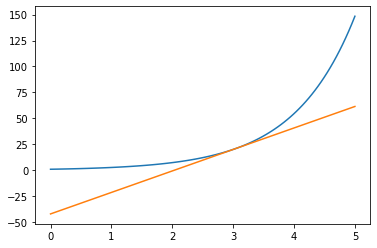

In [3]:
time = np.linspace(0, 5, 100)
OD600 = np.exp(time)
i=60
a=OD600[i]
b=(1-time[i])*OD600[i]
plt.plot(time, OD600)
plt.plot(time,a*(time)+b);

In [ ]:
Manually do a simple differention like 2x**2

## Differential equation describing bacterial growth
Now that we reviewed the definition of differential we can go back to our E. coli and formulate a differential equation $\frac{dN(t)}{dt}=f(t)$.  


In [ ]:
Now that we know about differnetial lets come with diff equation for E. cloli growth

## Analytical solution of $\frac{dN}{dt}=kN$
**We will have a whole lecture about analytical solutions of differential equations.**  
We can solve $\frac{dN}{dt}=kN$ analytically (i.e. find an exact function so that $N(t)=f(t)$) using SymPy library that allows symbolic calculations in Python.  
In order to do symbolic calculations we need to tell the computer what is a function and what is a variable (i.e. we need to define variable):

In [ ]:
N = sym.symbols("N", cls=sym.Function)  # this defines N as a function
t, k, N0 = sym.symbols("t, k, N0")  # this defines t and N0 as variable

Now that defined variable, we can write the differential equation that we want to solve:

In [ ]:
Equation = sym.Eq(sym.diff(N(t), t), k * N(t))
Equation

Now we can solve $Equation$ using $dsolve()$ function in SymPy using initial condition $N(0)=N_{0}$

In [ ]:
sym.dsolve(Equation, N(t))

We can get the exact solution with $C_1$ constant using initial condition $N(0)=N_{0}$

In [ ]:
sym.dsolve(Equation, N(t), ics={N(0): N0})

We can also write all of the above at once without using $Equation$ to save space.  
Try to change this differential equation by using $N(t)^2$, $N(t)^3$, $\frac{1}{N(t)}$ etc to see how the solution changes.

In [ ]:
N = sym.symbols("N", cls=sym.Function)
t, k, N0 = sym.symbols("t, k, N0")
sym.dsolve(sym.diff(N(t), t) - k * N(t), N(t), ics={N(0): N0})

*The above three lines of code will solve any differential equation from a Differential Equations textbook (i.e. any differential equation that has an analytical solution) highlighting the power of python and SymPy.*

## Numerical solution of $\frac{dN}{dt}=kN$
**We will have a whole lecture about numerical solutions of differential equations.**

**The majority of differential equations and especially systems of differential equations do not have an analytical solution so numerical solution is really how differential equations are analyzed outside of the classroom.**

We can solve $\frac{dN}{dt}=kN$ numerically (i.e. find numbers that correspond to a solution without finding an exact function) using SciPy library that allows numerical calculations in Python.  

In [ ]:
k = 1


def fun(t, y):
    dNdt = k * y
    return dNdt


N0 = [1]
tspan = [0, 5]
soln = solve_ivp(fun, tspan, N0)
plt.scatter(soln.t, soln.y[0]);

If we want to look at the solution at specific times then we can add *t_eval* keyword argument (kwarg):

In [ ]:
k = 1


def fun(t, y):
    dNdt = k * y
    return dNdt


N0 = [1]
tspan = [0, 5]
soln = solve_ivp(fun, tspan, N0, t_eval=np.linspace(0, 5, 6))
plt.scatter(soln.t, soln.y[0]);

*solve_ivp()* has a lot of various options for using specific algorythms, introducing events etc that you can lookup using *solve_ivp?* and that we will review during our numerical calculations lecture

In [ ]:
solve_ivp?

*solve_ivp will solve all differential equation that SymPy solve() can solve and essentially any other differential equation or system of differential equations highlighting the power of numerical calculations.*